###Keras로 RNN 구현하기

In [ ]:
# RNN층을 추가하는 코드
model.add(SimpleRNN(hidden_size)) # 가장 간단한 형태

In [ ]:
# 추가 인자를 사용할 때 
model.add(SimpleRNN(hidden_size, input_shape = (timesteps, input_dim))

# 다른 표기 
model.add(SimpleRNN(hidden_size, input_length=M, input_dim=N))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

In [ ]:
model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10)))
# model.add(SimpleRNN(3, input_length=2, input_dim=10)) 동일

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (8, 3)                    42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10), return_sequences=True))  # 숫자 2는 timestep , 10 은 입력dimension
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (8, 2, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


### 파이썬으로 RNN구현하기


$$ h_t = tanh(W_x X_t + W_h h_{t-1} +b) $$

```
hidden_state = 0 # 초기 은닉 상태를 0으로 초기화
for input_t in input_length: # 각 시점마다 입력을 받는다.
    output_t = tanh(input_t, hidden_state_t) # 각 시점에 대해서 입력과 은닉 상태를 가지고 연산
    hidden_state_t = output_t # 계산 결과는 현재 시점의 은닉 상태과 된다.
```

In [ ]:
import numpy as np

timesteps = 10
input_dim = 4
hidden_size = 8

# 입력에 해당되는 2D 텐서
inputs = np.random.random((timesteps, input_dim))

# 초기 은닉 상태는 0벡터로 초기화
hidden_state_t = np.zeros((hidden_size,))

In [ ]:
print(hidden_state_t) # 8의 크기를 가지는 hidden stat. 현재는 초기 hidden state로 모든 차원이 0의 값을 가짐

[0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
Wx = np.random.random((hidden_size, input_dim)) # (8,4) 2D텐서 생성 입력에 대한 가중치
Wh = np.random.random((hidden_size, hidden_size)) # (8,8) 크기의 2D텐서 생성, hidden state에 대한 가중치
b = np.random.random((hidden_size)) # (8,)크기의 1D 텐서 생성. 편향(bias)

In [ ]:
print(np.shape(Wx)) # hidden state x 입력의 차원
print(np.shape(Wh)) # hidden state x hidden state size
print(np.shape(b)) # hidden state size

(8, 4)
(8, 8)
(8,)


In [ ]:
total_hidden_states = []

# 메모리 셀 동작
for input_t in inputs : # 각 시점에 따라서 입력값이 입력이 됨 
  output_t = np.tanh(np.dot(Wx, input_t) + np.dot(Wh, hidden_state_t)+b) 
  # Wx + Wt + Wh * Ht-1 + b
  total_hidden_states.append(list(output_t)) # 각 시점의 은닉 상태의 값을 계속해서축적
  print(np.shape(total_hidden_states)) # 각 시점 t 별 메모리 셀의 출력의 크기는 (timestep, output)
  hidden_state_t = output_t

total_hidden_states = np.stack(total_hidden_states, axis=0)

# (timesteps, output_dim)
print(total_hidden_states)

(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.99999457 0.99940573 0.99992118 0.99997085 0.99999229 0.99999556
  0.99993336 0.99990566]
 [0.99999589 0.99940661 0.99992628 0.99997745 0.99999289 0.99999613
  0.99994839 0.999919  ]
 [0.99999537 0.99945561 0.99993804 0.99997482 0.99999697 0.99999536
  0.99995875 0.99992127]
 [0.99998053 0.99921751 0.99985951 0.99997183 0.99997331 0.99999304
  0.99993563 0.99986943]
 [0.99999574 0.99890081 0.99991065 0.99996925 0.99999078 0.9999954
  0.999948   0.99993503]
 [0.99999369 0.99936828 0.99991067 0.99996225 0.99998821 0.99999537
  0.99990028 0.99989101]
 [0.99999509 0.99913202 0.99991315 0.99995997 0.99999061 0.9999953
  0.99991853 0.99991641]
 [0.99998676 0.99932573 0.99988971 0.9999745  0.99998601 0.99999382
  0.99994669 0.999886  ]
 [0.99997839 0.9990737  0.99985254 0.99993012 0.99997148 0.99999176
  0.99983761 0.99984004]
 [0.99998688 0.99924966 0.99989465 0.99993798 0.99998871 0.99999286
  0.99987493 0.999866  ]]


In [ ]:
model=Sequential()
model.add(SimpleRNN(hidden_size, input_length = 10, input_dim=5, return_sequences=True))
model.add(SimpleRNN(hidden_size, return_sequences=True))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_6 (SimpleRNN)     (None, 10, 8)             112       
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 10, 8)             136       
Total params: 248
Trainable params: 248
Non-trainable params: 0
_________________________________________________________________


### BiLSTM

In [ ]:
from tensorflow.keras.layers import Bidirectional

In [ ]:
timesteps = 10
input_dim = 5

In [ ]:
model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences=True, input_shape=(timesteps, input_dim))))

In [ ]:
model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences=True, input_shape=(timesteps, input_dim))))
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences=True)
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences=True)
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences=True)

SyntaxError: ignored

### 임의의 입력으로 Simple RNN 생성

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional

In [ ]:
train_x = [[0.1, 4.2, 1.5, 1.1, 2.8],
           [1.0, 3.1, 2.5, 0.7, 1.1],
           [0.3, 2.1, 1.5, 2.1, 0.1],
           [2.2, 1.4, 0.5, 0.9, 1.1]]
print(np.shape(train_x)) # 단어 벡터의 차원은 5, 문장의 길이 4

(4, 5)


In [ ]:
train_x = [[[0.1, 4.2, 1.5, 1.1, 2.8],
           [1.0, 3.1, 2.5, 0.7, 1.1],
           [0.3, 2.1, 1.5, 2.1, 0.1],
           [2.2, 1.4, 0.5, 0.9, 1.1]]]
train_x = np.array(train_x, dtype=np.float32)
print(train_x.shape) # (batch_size, timesteps, input_dim)

(1, 4, 5)


In [ ]:
rnn = SimpleRNN(3)
# rnn = SimpleRNN(3, return_sequences=False, return_State=False) 와 동일
hidden_state = rnn(train_x)

print('hidden state : {}'.format(hidden_state, hidden_state.shape))

hidden state : [[ 0.9585552  -0.9833181  -0.96317095]]


In [ ]:
rnn = SimpleRNN(3, return_sequences=True)
hidden_states = rnn(train_x)

print('hidden state : {}, shape : {}'.format(hidden_states, hidden_states.shape))

hidden state : [[[ 0.73440087 -0.99886197  0.97580206]
  [ 0.9831499  -0.9074497   0.84903973]
  [ 0.99621284  0.04848466  0.9006691 ]
  [ 0.9405539  -0.52170473 -0.9263722 ]]], shape : (1, 4, 3)


In [ ]:
rnn = SimpleRNN(3, return_sequences=True, return_state=True)
hidden_states, last_states = rnn(train_x)

print('hidden states : {}. shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape : {}'.format(last_states, last_states.shape))

hidden states : [[[0.99910957 0.9992544  0.98974437]
  [0.9986736  0.9900416  0.95921373]
  [0.99087435 0.99619377 0.5590902 ]
  [0.5076959  0.9759134  0.8959369 ]]]. shape: (1, 4, 3)
last hidden state : [[0.5076959 0.9759134 0.8959369]], shape : (1, 3)


In [ ]:
rnn = SimpleRNN(3, return_sequences=False, return_state=True)
hidden_state, last_state = rnn(train_x)

print('hidden state : {}, shape : {}'.format(hidden_state, hidden_state.shape))
print('last state : {}, shape : {}'.format(last_state, last_state.shape))

hidden state : [[ 0.04780062  0.4378571  -0.6263328 ]], shape : (1, 3)
last state : [[ 0.04780062  0.4378571  -0.6263328 ]], shape : (1, 3)


### LSTM 이해하기

LSTM Gradient Vanishing을 해결하기 위해 cell_state가 존재 

In [ ]:
lstm = LSTM(3, return_sequences=False, return_state=True)
hidden_state, last_state, last_cell_state = lstm(train_x)

print('hidden state : {}, shape : {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape : {}'.format(last_state, last_state.shape))
print('last cell state : {}, shape : {}'.format(last_cell_state, last_cell_state.shape))

hidden state : [[0.03479569 0.25127345 0.23740418]], shape : (1, 3)
last hidden state : [[0.03479569 0.25127345 0.23740418]], shape : (1, 3)
last cell state : [[0.09323546 1.2514576  0.47049052]], shape : (1, 3)


In [ ]:
lstm = LSTM(3, return_sequences=True, return_state=True)
hidden_states, last_state, last_cell_state = lstm(train_x)

print('hidden states : {}, shape : {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape : {}'.format(last_state, last_state.shape))
print('last cell state : {}, shape : {}'.format(last_cell_state, last_cell_state.shape))

hidden states : [[[-0.08461077  0.16426979 -0.06027574]
  [-0.19936146  0.2352993  -0.09469581]
  [-0.4098468   0.27461997  0.20135024]
  [-0.5383824   0.17362173  0.37396243]]], shape : (1, 4, 3)
last hidden state : [[-0.5383824   0.17362173  0.37396243]], shape : (1, 3)
last cell state : [[-0.9365615  0.9083917  0.5841155]], shape : (1, 3)


### LSTM 이해하기 2

In [ ]:
x = np.array([[1,2,3],
             [2,3,4],
             [3,4,5],
             [4,5,6],
             [5,6,7],
             [6,7,8],
             [7,8,9],
             [8,9,10],
             [9,10,11],
             [10,11,12],
             [20,30,40],
             [30,40,50],
             [40, 50, 60]])
y = np.array([4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 50, 60, 70])
x.shape, y.shape

((13, 3), (13,))

In [ ]:
x = x.reshape((x.shape[0], x.shape[1],1))
print(x.shape)

(13, 3, 1)


In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.LSTM(20, activation='relu', input_shape=(3,1)))
model.add(keras.layers.Dense(5, activation='relu'))
model.add(keras.layers.Dense(1))

In [ ]:
model.compile(optimizer='adam', loss = 'mse')

In [ ]:
es = keras.callbacks.EarlyStopping(monitor='loss', patience=10, mode='auto')
model.fit(x, y, epochs=1000, batch_size=1, verbose=1, callbacks=[es])

Epoch 1/1000
13/13 [==============================] - 1s 2ms/step - loss: 973.3602
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 948.9576
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 934.7300
Epoch 4/1000
13/13 [==============================] - 0s 3ms/step - loss: 924.4479
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 914.7365
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 908.5821
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 905.7686
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 905.7791
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 905.0863
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 904.6878
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 904.3930
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 904.0156
E

In [ ]:
x_test = np.array([25, 35, 45])
x_test = x_test.reshape((1,3,1))

pred = model.predict(x_test)
pred

array([[7.5916824]], dtype=float32)

### 네이버에서 데이터 받아와서 주식 가격 예측하기

In [ ]:
import time
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras


In [ ]:
stock_price = pd.DataFrame()  # 주가 데이터를 저장할 dataframe

In [ ]:
stock_number = '035420'
pages = 50

In [ ]:
for page in range(1, pages+1):
    url = f'https://finance.naver.com/item/sise_day.nhn?code={stock_number}&page={page}'
    headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36'}
    response = requests.get(url, headers=headers)
    time.sleep(0.5)
    html = BeautifulSoup(response.text, "lxml")

    table = html.select("table")

    juga = pd.read_html(str(table))
    juga = juga[0].dropna()
    stock_price = pd.concat([stock_price,juga], axis=0)

In [ ]:
stock_price = stock_price.reset_index(drop=True)

In [ ]:
stock_price.tail()

,날짜,종가,전일비,시가,고가,저가,거래량
495,2019.10.31,164000.0,9500.0,159000.0,167000.0,157500.0,1409619.0
496,2019.10.30,154500.0,1500.0,152000.0,154500.0,151500.0,290658.0
497,2019.10.29,153000.0,4000.0,157500.0,158000.0,152000.0,321007.0
498,2019.10.28,157000.0,4500.0,152500.0,158000.0,152500.0,335238.0
499,2019.10.25,152500.0,500.0,151000.0,153500.0,151000.0,162510.0


In [ ]:
stock_price["날짜"] = pd.to_datetime(stock_price["날짜"])


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_te

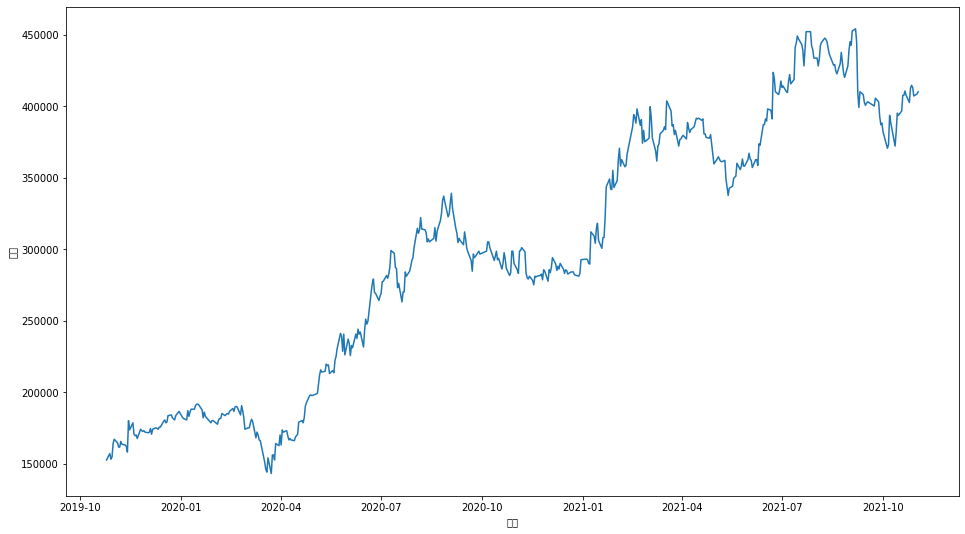

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=stock_price['종가'], x=stock_price['날짜'])
plt.show()

In [ ]:
# minmax

scaler = MinMaxScaler()
scale_cols=['시가', '고가','저가', '거래량']
scaled = scaler.fit_transform(stock_price[scale_cols])

scaled_stock = pd.DataFrame(scaled)

In [ ]:
scaled_stock.columns = scale_cols

In [ ]:
scaled_stock


,시가,고가,저가,거래량
0,0.841444,0.839937,0.864353,0.059531
1,0.833595,0.830428,0.848580,0.055560
2,0.852433,0.839937,0.853312,0.098544
3,0.871272,0.855784,0.872240,0.105766
4,0.858713,0.854200,0.872240,0.106513
...,...,...,...,...
495,0.054945,0.055468,0.070978,0.396986
496,0.032967,0.015848,0.052050,0.040793
497,0.050235,0.026941,0.053628,0.050454
498,0.034537,0.026941,0.055205,0.054984


In [ ]:
end_price = np.log1p(stock_price['종가'])

In [ ]:
scaled_stock['종가'] = end_price

In [ ]:
train = scaled_stock[:-30]
test = scaled_stock[-30:]

In [ ]:
train.shape, test.shape

((470, 5), (30, 5))

In [ ]:
def make_dataset(data, label, window_size=20) :
  feature_list = []
  label_list = []
  for i in range(len(data) - window_size) :
    feature_list.append(np.array(data.iloc[i:i+window_size]))
    label_list.append(np.array(label.iloc[i+window_size]))
  return np.array(feature_list),np.array(label_list)

In [ ]:
train_feature = train[['시가', '고가', '저가', '거래량']]
train_label = train['종가']

test_feature = test[['시가', '고가', '저가', '거래량']]
test_label = test[['종가']]

In [ ]:
train_feature, train_label = make_dataset(train_feature, train_label, 10)

# train, validation set 생성
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size = 0.2)

# test dataset (실제 예측 해볼 데이터 )
test_feature, test_label = make_dataset(test_feature, test_label, 10)

In [ ]:
train_feature.shape[1], train_feature.shape[2]

(10, 4)

In [ ]:
train_feature.shape

(460, 10, 4)

In [ ]:
model = keras.Sequential([
                          keras.layers.LSTM(16, input_shape=(10, 4), activation='relu'),
                          keras.layers.Dense(1)
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss= 'mse',
)

In [ ]:
epoch = 500
batch_size = 64

es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)
cp = keras.callbacks.ModelCheckpoint('predict_juga_2.h5', monitor='val_loss', save_best_only=True)

In [ ]:
history = model.fit(x_train, y_train,
                    epochs= epoch,
                    batch_size = batch_size,
                    validation_data = (x_valid, y_valid),
                    callbacks=[es, cp])

Epoch 1/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0029 - val_loss: 0.0023
Epoch 2/500
6/6 [==============================] - 0s 8ms/step - loss: 0.0030 - val_loss: 0.0017
Epoch 3/500
6/6 [==============================] - 0s 8ms/step - loss: 0.0029 - val_loss: 0.0018
Epoch 4/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 5/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 6/500
6/6 [==============================] - 0s 8ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 7/500
6/6 [==============================] - 0s 9ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 8/500
6/6 [==============================] - 0s 8ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 9/500
6/6 [==============================] - 0s 8ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 10/500
6/6 [==============================] - 0s 8ms/step - loss: 0.0025 - val_loss: 0.0017
Epoch 11/500
6/6 [==========

In [ ]:
# 최고의 모델을 가져와서 test
loaded_models = keras.models.load_model("predict_juga_2.h5")

In [ ]:
pred = loaded_models.predict(test_feature)

In [ ]:
pred = np.expm1(pred)

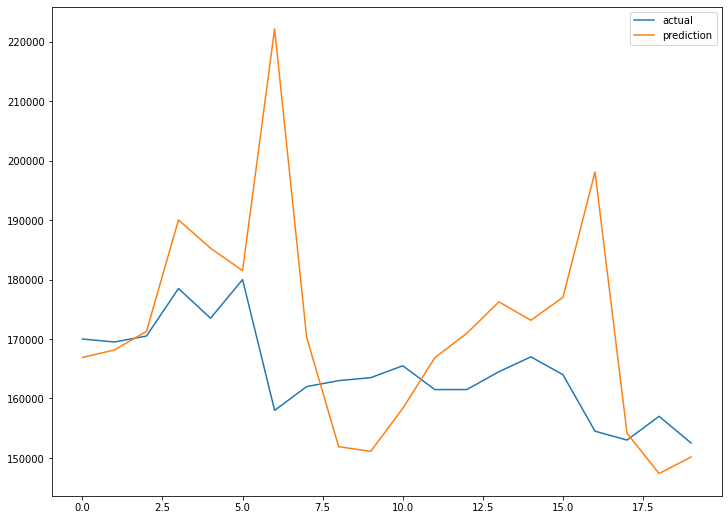

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(np.expm1(test_label), label='actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()